In [3]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import random
import pandas as pd
import numpy as np

In [8]:

file_path = 'mnist_784_csv.csv'  # Make sure the path is correct

df=pd.read_csv(file_path)

In [11]:

labels = df['class'].values  # Use 'class' as the label column name
pixels = df.drop('class', axis=1).values 


In [12]:
pixels = pixels.reshape(-1, 28, 28)  # Reshape to (num_samples, 28, 28)
pixels = pixels / 255.0 

In [13]:
labels_encoded = to_categorical(labels, num_classes=10)


In [14]:
# Split data into training and testing sets
split_idx = int(0.8 * len(pixels))
x_train, x_test = pixels[:split_idx], pixels[split_idx:]
y_train, y_test = labels_encoded[:split_idx], labels_encoded[split_idx:]



In [16]:
from tensorflow.keras.layers import Input

# Define the Feedforward Neural Network model
model = Sequential([
    Input(shape=(28, 28)),                   # Input layer with shape (28, 28)
    Flatten(),                                # Flatten the 28x28 images into a 784-dimensional vector
    Dense(128, activation='relu'),           # First hidden layer with 128 neurons and ReLU activation
    Dense(64, activation='relu'),            # Second hidden layer with 64 neurons and ReLU activation
    Dense(10, activation='softmax')          # Output layer with 10 neurons for 10 classes (0-9 digits)
])


In [17]:

# Compile the model
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [18]:

# Train the model
history = model.fit(x_train, y_train, 
                    epochs=10, 
                    validation_data=(x_test, y_test))

Epoch 1/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.8795 - loss: 0.4259 - val_accuracy: 0.9606 - val_loss: 0.1258
Epoch 2/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9662 - loss: 0.1079 - val_accuracy: 0.9704 - val_loss: 0.0922
Epoch 3/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9775 - loss: 0.0723 - val_accuracy: 0.9756 - val_loss: 0.0785
Epoch 4/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9858 - loss: 0.0474 - val_accuracy: 0.9726 - val_loss: 0.0931
Epoch 5/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9869 - loss: 0.0423 - val_accuracy: 0.9756 - val_loss: 0.0830
Epoch 6/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9902 - loss: 0.0304 - val_accuracy: 0.9777 - val_loss: 0.0814
Epoch 7/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9921 - loss: 0.0257 - val_accuracy: 0.9757 - val_loss: 0.0861
Epoch 8/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9926 - loss: 0

In [19]:

# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_accuracy:.4f}")

438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9752 - loss: 0.1118
Test accuracy: 0.9776


Text(0.5, 1.0, 'Model Accuracy')

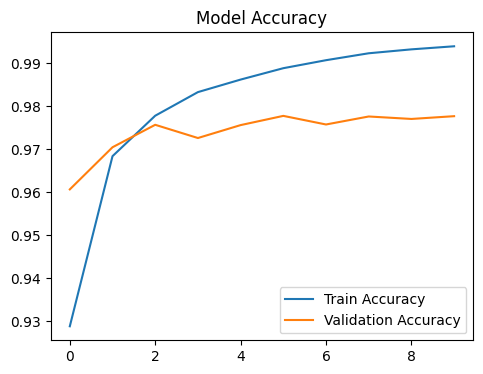

In [20]:

# Plot accuracy and loss curves
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Model Accuracy')

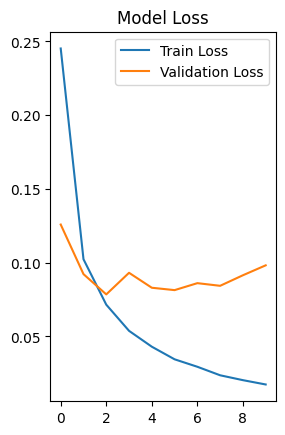

In [21]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Model Loss')
plt.show()

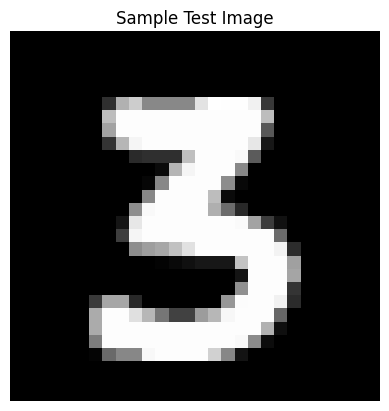

In [22]:
# Display a random image from the test set with actual and predicted labels
n = random.randint(0, len(x_test) - 1)
plt.imshow(x_test[n], cmap='gray')
plt.title("Sample Test Image")
plt.axis('off')
plt.show()

In [23]:

# Predict the label for the selected image
predicted_value = model.predict(x_test)
print("Actual Number:", np.argmax(y_test[n]))  # Actual label
print("Predicted Number:", np.argmax(predicted_value[n]))  

438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
Actual Number: 3
Predicted Number: 3
